# TensorFlow
- 1.สร้าง Neural Network Model โดยใช้ TensorFlow & Keras
- 2.Dataset: Breast Cancer, 2 Features
- 3.Binary Classification

In [1]:
import tensorflow as tf
tf.__version__

'2.10.0'

In [2]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [3]:
cancer = load_breast_cancer()

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(cancer.DESCR)

In [7]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [12]:
cancer.target[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [19]:
df = pd.DataFrame(cancer.data[:,0:2],columns=cancer.feature_names[0:2])

df['class'] = cancer.target
df.sample(5,random_state=1)
df.tail()

,mean radius,mean texture,class
564,21.56,22.39,0
565,20.13,28.25,0
566,16.60,28.08,0
567,20.60,29.33,0
568,7.76,24.54,1


In [13]:
cancer.data[:,0:2]

array([[17.99, 10.38],
       [20.57, 17.77],
       [19.69, 21.25],
       ...,
       [16.6 , 28.08],
       [20.6 , 29.33],
       [ 7.76, 24.54]])

In [14]:
columns=cancer.feature_names[0:2]

In [25]:
print(columns)
print(df)

['mean radius' 'mean texture']
     mean radius  mean texture  class
0          17.99         10.38      0
1          20.57         17.77      0
2          19.69         21.25      0
3          11.42         20.38      0
4          20.29         14.34      0
..           ...           ...    ...
564        21.56         22.39      0
565        20.13         28.25      0
566        16.60         28.08      0
567        20.60         29.33      0
568         7.76         24.54      1

[569 rows x 3 columns]


In [22]:
df.describe().round(2)

,mean radius,mean texture,class
count,569.00,569.00,569.00
mean,14.13,19.29,0.63
std,3.52,4.30,0.48
min,6.98,9.71,0.00
25%,11.70,16.17,0.00
50%,13.37,18.84,1.00
75%,15.78,21.80,1.00
max,28.11,39.28,1.00


In [23]:
df.groupby('class').count()

,mean radius,mean texture
class,,
0,212,212
1,357,357


# Data visualization

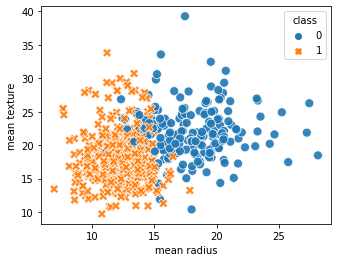

In [29]:
plt.figure(figsize=(5.2, 4))

sns.scatterplot(x='mean radius', y='mean texture', data=df, hue='class', style='class', 
                alpha=0.9, edgecolor='w', s=80)

plt.show()

# Label Encoding

In [30]:
y, class_names = pd.factorize(df['class'])
class_names

Int64Index([0, 1], dtype='int64')

In [31]:
y[40:50]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [32]:
print('Class 0:', len(y[y==0]))
print('Class 1:', len(y[y==1]))

Class 0: 212
Class 1: 357


In [33]:
np.unique(y)

array([0, 1], dtype=int64)

# X and Y

In [34]:
X = df.drop('class', axis=1)
X.head()

,mean radius,mean texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34


In [35]:
y = df['class']     # กรณี: ไม่ทำ Label Encoding. 

In [36]:
y[:15]

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
Name: class, dtype: int32

In [37]:
np.unique(y)

array([0, 1])

# Feature Scaling using StandardScaler

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc[:5]

array([[ 1.09706398, -2.07333501],
       [ 1.82982061, -0.35363241],
       [ 1.57988811,  0.45618695],
       [-0.76890929,  0.25373211],
       [ 1.75029663, -1.15181643]])

In [40]:
cancer.feature_names[0:2]    # ชื่อ columns 2 features แรก

array(['mean radius', 'mean texture'], dtype='<U23')

In [41]:
dfsc = pd.DataFrame(X_sc, columns=['mean radius','mean texture'])
dfsc['class'] = y

dfsc.describe().round(3)

,mean radius,mean texture,class
count,569.000,569.000,569.000
mean,-0.000,0.000,0.627
std,1.001,1.001,0.484
min,-2.030,-2.229,0.000
25%,-0.689,-0.726,0.000
50%,-0.215,-0.105,1.000
75%,0.469,0.584,1.000
max,3.971,4.652,1.000


# KDE plot

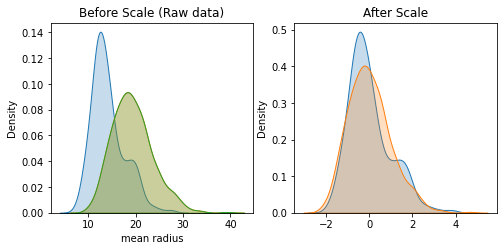

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 3.5))

ax1.set_title('Before Scale (Raw data)')
sns.kdeplot(df['mean radius'], fill=True, ax=ax1)
sns.kdeplot(df['mean texture'], fill=True, ax=ax1)

ax2.set_title('After Scale')
sns.kdeplot(X_sc[:,0], fill=True, ax=ax2)
sns.kdeplot(X_sc[:,1], fill=True, ax=ax2)
sns.kdeplot(df['mean texture'], fill=True, ax=ax1)

plt.show()

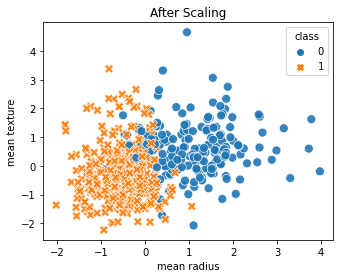

In [43]:
plt.figure(figsize=(5.2, 4))

sns.scatterplot(x='mean radius', y='mean texture', data=dfsc, hue='class', style='class', 
                alpha=0.9, edgecolor='w', s=80)
plt.title('After Scaling')
plt.show()

In [44]:
X_sc[:5]

array([[ 1.09706398, -2.07333501],
       [ 1.82982061, -0.35363241],
       [ 1.57988811,  0.45618695],
       [-0.76890929,  0.25373211],
       [ 1.75029663, -1.15181643]])

In [45]:
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int32

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.25, random_state=1) #

X_train.shape, X_test.shape

((426, 2), (143, 2))

In [47]:
y_train.shape, y_test.shape 

((426,), (143,))

In [48]:
X_train[:5]

array([[ 0.31034466,  2.63664885],
       [ 0.23650097, -0.04413248],
       [ 0.15697699,  0.19555543],
       [-1.0813249 , -0.68407594],
       [-0.64678318, -0.42577149]])

In [51]:
y_train[:-1]

562    0
291    1
16     0
546    1
293    1
      ..
508    1
129    0
144    1
72     0
235    1
Name: class, Length: 425, dtype: int32

In [50]:
## Training set (class 0 & 1)
print('Train; Class 0:', len(y_train[y_train==0]))
print('Train; Class 1:', len(y_train[y_train==1]))
print('Total:',len(y_train))

Train; Class 0: 157
Train; Class 1: 269
Total: 426


# Model

In [52]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input 

In [53]:
X_train.shape

(426, 2)

In [54]:
input_size = X_train.shape[-1]     # input size
input_size

2

# Create a Model

In [ ]:
(input: 2-dim)
       ↧
[Dense (32 units, relu activation)]
       ↧
[Dense (1 unit, sigmoid activation)]
       ↧
(output: probability 2 classes)

In [59]:
# Sequential Model using Input
model = Sequential()

# model.add(Input(shape=(2,)))
model.add(Input(shape=(input_size,)))

model.add(Dense(32, activation='relu'))  
# model.add(Dense(128, activation='relu'))  
# model.add(Dense(128, activation='relu'))  

model.add(Dense(1, activation='sigmoid'))   # 2 class (Binary classification)

# Model Info

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                96        
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 2),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_2'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_2',
    'trainable': True,
    'dtype': 'float32',
    'units': 32,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_3',
    'trainable': True,
    'dtype': 'float32',
    'units': 1,
    'activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'con

# Compile

In [62]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train

In [63]:
import time

start = time.time()
history = model.fit(X_train, y_train, epochs=40, verbose=1, batch_size=32, validation_split=0.25) # 10 +10 40 100
end = time.time()

print(f"Time Taken {end - start:.3f} secs")
print("Time Taken: {:.3f} secs".format(end - start))

Epoch 1/40
10/10 [==============================] - 2s 137ms/step - loss: 0.7380 - accuracy: 0.4263 - val_loss: 0.7025 - val_accuracy: 0.5607
Epoch 2/40
10/10 [==============================] - 0s 6ms/step - loss: 0.6926 - accuracy: 0.6364 - val_loss: 0.6641 - val_accuracy: 0.7850
Epoch 3/40
10/10 [==============================] - 0s 6ms/step - loss: 0.6513 - accuracy: 0.7931 - val_loss: 0.6294 - val_accuracy: 0.8224
Epoch 4/40
10/10 [==============================] - 0s 5ms/step - loss: 0.6135 - accuracy: 0.8182 - val_loss: 0.5982 - val_accuracy: 0.8318
Epoch 5/40
10/10 [==============================] - 0s 5ms/step - loss: 0.5796 - accuracy: 0.8370 - val_loss: 0.5694 - val_accuracy: 0.8505
Epoch 6/40
10/10 [==============================] - 0s 8ms/step - loss: 0.5484 - accuracy: 0.8558 - val_loss: 0.5427 - val_accuracy: 0.8598
Epoch 7/40
10/10 [==============================] - 0s 6ms/step - loss: 0.5199 - accuracy: 0.8715 - val_loss: 0.5178 - val_accuracy: 0.8598
Epoch 8/40
10/10 [

# Loss and Accuracy Curves

In [65]:
history.params

{'verbose': 1, 'epochs': 40, 'steps': 10}

In [66]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

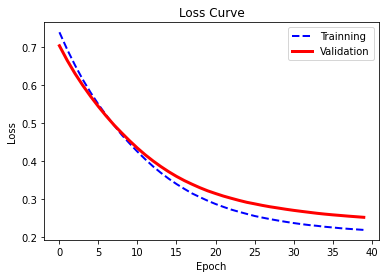

In [67]:

plt.plot(history.history['loss'], '--', c='b', lw=2, label='Trainning')
plt.plot(history.history['val_loss'], c='r', lw=3, label='Validation')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.title('Loss Curve')
plt.show()

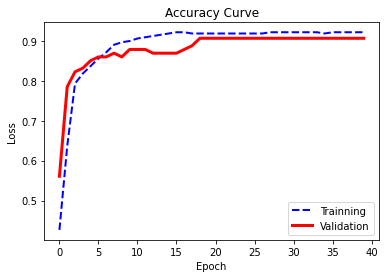

In [68]:
plt.plot(history.history['accuracy'], '--', c='b', lw=2, label='Trainning')
plt.plot(history.history['val_accuracy'], c='r', lw=3, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

# Tensor board

In [69]:
from keras.callbacks import TensorBoard

history = model.fit(X_train, y_train, epochs=40, verbose=0, 
                    batch_size=32, validation_split=0.25,
                    callbacks=[TensorBoard(log_dir='./log')])  

In [70]:
%load_ext tensorboard
# %reload_ext tensorboard
%tensorboard --logdir ./log

# Evaluate
epochs=10, Hidden=32, accuracy: 0.8252 <br>
epochs=20 (train +10), Hidden=32, accuracy: 0.85 <br>
epochs=40, Hidden=32, accuracy: 0.86

In [72]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print(f"Test accuracy: {score[1]:.4f}")

Test loss: 0.35106340050697327
Test accuracy: 0.8531


In [73]:
y_pred_pr = model.predict(X_test)
y_pred_pr[:4]

5/5 [==============================] - 0s 2ms/step


array([[0.9274392 ],
       [0.9082005 ],
       [0.9642782 ],
       [0.03854415]], dtype=float32)

In [74]:
y_pred = (y_pred_pr > 0.5).astype(int)  
# y_pred = np.where(y_pred_pr > .5, 1,0)

y_pred[:4]

array([[1],
       [1],
       [1],
       [0]])

In [75]:
from sklearn.metrics import classification_report, confusion_matrix

print('Score->',score[1])

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Score-> 0.8531468510627747
              precision    recall  f1-score   support

           0       0.84      0.76      0.80        55
           1       0.86      0.91      0.88        88

    accuracy                           0.85       143
   macro avg       0.85      0.84      0.84       143
weighted avg       0.85      0.85      0.85       143

[[42 13]
 [ 8 80]]


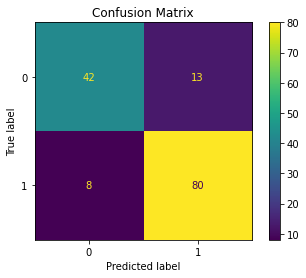

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)   ## <-- 
ConfusionMatrixDisplay(cm, display_labels=class_names).plot()
plt.title('Confusion Matrix')
plt.show()